<a href="https://colab.research.google.com/github/tonyyoung3/python_stock/blob/main/stock_risk_evaluation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip3 install yfinance

     |████████████████████████████████| 6.3MB 31.5MB/s 
  Created wheel for yfinance: filename=yfinance-0.1.59-py2.py3-none-any.whl size=23455 sha256=185e2d903628f3be39fd02eddc9e88fbcdc69c6ef1163a45fda9bfb49700fe2b
  Stored in directory: /root/.cache/pip/wheels/f8/2a/0f/4b5a86e1d52e451757eb6bc17fd899629f0925c777741b6d04
Successfully built yfinance
  Found existing installation: lxml 4.2.6
    Uninstalling lxml-4.2.6:
      Successfully uninstalled lxml-4.2.6


In [2]:
import requests
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.optimize as solver
import yfinance as yf

from functools import reduce


In [3]:
historical_data = pd.DataFrame()

In [4]:
STOCK = ['^TWII','2330.TW','2317.TW','2454.TW','2881.TW','2002.TW']

In [6]:
for i in STOCK :
  hisdata = yf.Ticker(i)
  df = hisdata.history(period="5y")
  df['STOCK_ID'] = i
  historical_data = pd.concat([historical_data, df])
  # time.sleep(0.8)

In [8]:
historical_data_f = historical_data[['STOCK_ID','Close']]
historical_data_f

,STOCK_ID,Close
Date,,
2016-06-30,^TWII,8666.567383
2016-07-01,^TWII,8738.227539
2016-07-04,^TWII,8760.567383
2016-07-05,^TWII,8716.057617
2016-07-06,^TWII,8575.737305
...,...,...
2021-06-24,2002.TW,35.799999
2021-06-25,2002.TW,35.750000
2021-06-28,2002.TW,37.450001


In [9]:
df_pivot = pd.pivot(historical_data_f.reset_index(), index="Date", columns="STOCK_ID", values="Close")
df_pivot

STOCK_ID,2002.TW,2317.TW,2330.TW,2454.TW,2881.TW,^TWII
Date,,,,,,
2016-06-30,17.853243,76.335289,139.538361,208.199997,31.531908,8666.567383
2016-07-01,17.639688,76.520348,142.543808,209.053299,31.490026,8738.227539
2016-07-04,17.895956,77.075508,142.543808,218.012726,31.280651,8760.567383
2016-07-05,17.810534,76.797928,140.826416,209.053299,30.987530,8716.057617
2016-07-06,17.511555,75.410004,138.679672,202.227066,30.233780,8575.737305
...,...,...,...,...,...,...
2021-06-24,35.799999,113.000000,590.000000,929.000000,71.900002,17407.960938
2021-06-25,35.750000,113.000000,591.000000,927.000000,72.900002,17502.990234
2021-06-28,37.450001,111.500000,590.000000,935.000000,73.199997,17590.970703


In [10]:
df_pivot.fillna(method = 'ffill',inplace=True) 

In [11]:
df_pivot.columns[df_pivot.isna().any()]

Index([], dtype='object', name='STOCK_ID')

In [12]:
df_pivot.index.name = None
df_pivot = df_pivot.rename_axis(columns=None)

In [13]:
df_period = df_pivot.groupby(df_pivot.index.strftime('%Y-%m')).tail(1)
returns_m = df_period.pct_change()
returns_m = returns_m[1:]
returns_m

,2002.TW,2317.TW,2330.TW,2454.TW,2881.TW,^TWII
2016-07-29,0.078626,0.065455,0.061538,0.044664,0.053121,0.036673
2016-08-31,0.000000,0.001138,0.023188,0.026694,0.127364,0.009399
2016-09-30,0.006803,0.032926,0.042493,-0.038000,0.035794,0.010806
2016-10-31,0.027027,0.077020,0.024457,-0.002079,-0.032397,0.013447
2016-11-30,0.096491,-0.038687,-0.029178,-0.077083,0.103795,-0.005318
2016-12-30,-0.014000,0.026829,-0.008197,-0.022573,0.031345,0.001384
2017-01-24,0.026369,-0.005938,0.022039,-0.013857,-0.007843,0.021014
2017-02-24,0.019763,0.069295,0.018868,0.049180,-0.016798,0.032020
2017-03-31,-0.019380,0.016760,0.000000,-0.040179,-0.005025,0.006261
2017-04-28,-0.043478,0.085714,0.029100,0.009302,-0.044445,0.006164


findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.


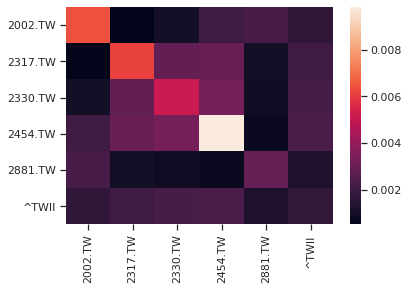

In [17]:
import seaborn as sn
cov = returns_m.cov()
# plt.figure(figsize=(50, 30))
#daily return
rc = {'font.sans-serif': 'SimHei',
      'axes.unicode_minus': False}
sn.set(context='notebook', style='ticks', rc=rc)
sn.heatmap(cov , fmt='g')
plt.show()

In [18]:
# beta = cov(stock,m)/ var(m)

for i in returns_m.columns:
  if i != '^TWII' :
    df_1 = returns_m[[i,'^TWII']]
    x = df_1.cov()['^TWII'].iloc[0]/df_1.cov()['^TWII'].iloc[1]
    type(x)
    print('beta of %s' % (i))
    print(x)
    print('')


beta of 2002.TW
0.9814648749257014

beta of 2317.TW
1.1744619272839054

beta of 2330.TW
1.278926635764909

beta of 2454.TW
1.352205705485644

beta of 2881.TW
0.7495921747308661



In [70]:
#sharp
risk_free = 0.01 
sharp  = (returns_m.mean()*12 - risk_free)/ np.sqrt(returns_m.var()*12) 
sharp


2002.TW    0.658891
2317.TW    0.386337
2330.TW    1.258203
2454.TW    1.039378
2881.TW    0.949344
^TWII      0.999549
dtype: float64

In [69]:
#sortino

for i in returns_m.columns:
  rtn = returns_m.mean()[i]*12
  df_i = returns_m[i]
  df_i = df_i[returns_m[i]<0] 
  dwn_var = 0
  for j in range(len(df_i)):
    dwn_var = dwn_var + ((df_i[j] - rtn) **2)
  
  sortino = (rtn*12 - risk_free)/ np.sqrt(dwn_var*12) 
  print('sortino of %s' % (i))
  print(sortino)
  print('')



sortino of 2002.TW
0.6123770418190394

sortino of 2317.TW
0.42801650330893404

sortino of 2330.TW
0.7191127629615879

sortino of 2454.TW
0.6331199691414937

sortino of 2881.TW
0.6066803590618493

sortino of ^TWII
0.6679479821250339



In [64]:
#R-square
import scipy
for i in returns_m.columns:
  if i != '^TWII' :
    x = returns_m['^TWII']
    y = returns_m[i]
    slope, intercept, r_value, p_value, std_err = scipy.stats.linregress(x, y)
    R2 = r_value**2
    print(i)
    print(R2)

2002.TW
0.2632004058751292
2317.TW
0.3929418460435262
2330.TW
0.5579381329669327
2454.TW
0.3270455646312485
2881.TW
0.3367586898865752


In [ ]:
#